In [1]:
import numpy as np
import matplotlib.pyplot as plt

from training_algorithm import TrainingAlgorithm

nn_adding, mean_losses_adding = TrainingAlgorithm(1)

n = np.arange(1, len(mean_losses_adding)+1)

plt.xlabel('Antall iterasjoner')
plt.ylabel('Gjennomsnittlig verdi av L')
plt.yscale("log")
plt.plot(n, mean_losses_adding)

Iterasjon  0  L =  4.285898260558518 
Iterasjon  1  L =  5.77273711434824 
Iterasjon  2  L =  32.09293392067157 


c:\Users\Bruker\Documents\04_STUDIE\VitBer\TMA4320-IndMat\VitBer_indMat\prosjekt_2_utlevert_kode\layers.py:180: RuntimeWarning: divide by zero encountered in log
  q = -np.log(p) #naturlig eller tier logaritme? /Dele på noe?


Iterasjon  3  L =  inf 
Iterasjon  4  L =  inf 
Iterasjon  5  L =  inf 
Iterasjon  6  L =  inf 
Iterasjon  7  L =  inf 
Iterasjon  8  L =  inf 
Iterasjon  9  L =  inf 
Iterasjon  10  L =  inf 
Iterasjon  11  L =  inf 
Iterasjon  12  L =  inf 
Iterasjon  13  L =  inf 
Iterasjon  14  L =  inf 
Iterasjon  15  L =  inf 
Iterasjon  16  L =  inf 


Under trening av algoritmen opplever vi to større feil ved minimering av Loss-funksjonen:
**Feil 1:** Både step_Adam og step_gd gir en økning i verdien til Loss-funksjonen. Step_Adam varierer før den divergerer, til forskjell fra step_gd som er helt lineær og svakt økende.\
**Feil 2:** Bruk av step_Adam gir "RuntimeWarning: divide by zero encountered in log q = -np.log(p)" for attention forward. 

Under debuggingen  har vi utforsket følgende hypoteser: 
1) Matriseelementer i p i attention forward er lik null, og np.log(p) gir feilmenldinger da logaritmen til 0 ikke eksisterer. Det er flere grunner til at p kan bli lik null, blant dem:
    - self.Y = onehot(y,m) blir null: dersom onehot ikke fungerer som den skal og og ikke leverer verdier lik 1 vil den kunne gi en null-matrise for self.Y = onehot(y,m). Vi sjekket derfor max-verdien i hver kolonne til onehot-matrisen og fikk at samtlige hadde en verdi 1. Onehot fungerer derfor tilsynelatende som den skal. 
    - self.Y_hat = Z[:,:,-r:] blir null: dersom Z = nn.forward(X) ikke fungerer slik den skal vil den kunne gi ut en Z som blir enten null eller veldig liten. Til å teste dette printet vi retur-verdien til hvert lag i forward. Vi oppdager at flere verdier i softmax divergerer mot null men tester samtidig kollonnesummene og ser at disse er lik 1 (eller tilnærmet lik +-10**-8). Siden Softmax er en sannsynlighetsfordeling kan det stemme at flere av elementene har sannsynligheter som er nærmest lik null, og siden kollonnesummene stemmer finner vi ingen åpenbare kilder til feil for Z.
2) Dimensjonsfeil 
    - dersom slizingen av Z ikke er gjort riktig og gir feil self.Y_hat = Z kan dette være en kilde til feil. Her sjekket vi derfor at både Y_hat og Y har like dimensjoner ("legge inn dim her")
    - feil bruk av einsum vil kunne gi feile dimensjoner som kan gå utover f.eks np.sum()-funksjonene som behandler sannsynlighetsfordelingene i forward pass eller på andre måter gjøre at informasjon går tapt i nettverket. Vi printet "shapen" til matrisene og forsikret oss om at de gir ut riktige dimensjoner. 
3) Feil i Adam (løser ikke problemet for step_gd)




--------------notater--------------------

Tester nn.forward(X)
* printer return-verdien til hvert lag. Oppdager at softmax divergerer mot null. Printer kollonnesummene, disse er lik 1 (eller tilnærmet lik +-10**-8). Siden Softmax er en sannsynlighetsfordeling kan det stemme at flere av elementene har sannsynligheter som er nærmest lik null.
* teori: onehot gir kun ut 0-elementer? Sjekket max i hver kollonne, får ut 1. Onehot fungerer derfor som den skal. 


* Generelt sjekket at\
    - ...einsum er brukt korrekt. Feil bruk av einsum vil kunne gi feile dimensjoner som kan gå utover f.eks np.sum()-funksjonene som behandler sannsynlighetsfordelingene eller på andre måter gjøre at informasjon går tapt i nettverket. Vi printet "shapen" til matrisene og forsikret oss om at de gir ut riktige dimensjoner. 
    - 

Denne ligger i attention forward

Sjekker hva som kan gi feil i p og elementene som utgjør p: p = np.sum(np.multiply(self.Y_hat,self.Y),axis=1). 
* self.Y: baserer seg på y. Testet at riktig hentet ut fra data_generators. Testet begge metodene, altså både å slice y med gammel data_generators og å hente ut y med riktig størrelse fra nye data_genarators. Da dette ikke utgjorde en forskjell benyttet vi videre ny og oppdattert data_generators
* self.Y_hat: divergerer mot null. Denne er en slicing av Z, har Z = nn.forward(X)
* sjekker at dimensjonene til Y og Y_hat er like.



Iterasjon  0  L =  2.3083778123221554 
Iterasjon  1  L =  2.3083905701260368 
Iterasjon  2  L =  2.308403329444613 
Iterasjon  3  L =  2.308416090281731 
Iterasjon  4  L =  2.3084288526578702 
Iterasjon  5  L =  2.308441618991911 
Iterasjon  6  L =  2.3084544042827053 
Iterasjon  7  L =  2.3084671953293183 
Iterasjon  8  L =  2.3084799881376994 
Iterasjon  9  L =  2.308492782859656 
Iterasjon  10  L =  2.308505578129202 
Iterasjon  11  L =  2.3085183744581665 
Iterasjon  12  L =  2.308531172347815 
Iterasjon  13  L =  2.308543971797592 
Iterasjon  14  L =  2.3085567719429987 
Iterasjon  15  L =  2.308569574983344 
Iterasjon  16  L =  2.3085823832931416 
Iterasjon  17  L =  2.3085951933231943 
Iterasjon  18  L =  2.308608004937965 
Iterasjon  19  L =  2.3086208181412653 
Iterasjon  20  L =  2.308633632936906 
Iterasjon  21  L =  2.308646449328691 
Iterasjon  22  L =  2.308659267320426 
Iterasjon  23  L =  2.308672086915908 
Iterasjon  24  L =  2.308684907868142 
Iterasjon  25  L =  2.30

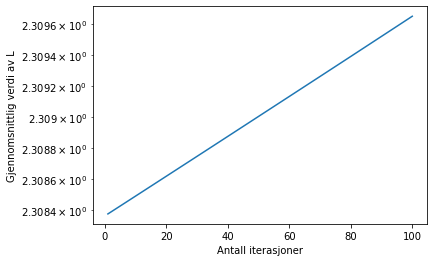

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from training_algorithm import TrainingAlgorithm

nn_adding, mean_losses_adding = TrainingAlgorithm(0)

n = np.arange(1, len(mean_losses_adding)+1)

plt.xlabel('Antall iterasjoner')
plt.ylabel('Gjennomsnittlig verdi av L')
plt.yscale("log")
plt.plot(n, mean_losses_adding)